<a href="https://colab.research.google.com/github/ShinjiNeo/Test_ML/blob/main/Template_Classificazione_Dic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificazione Dicotomica

## Librerie

- Librerie da installare


In [2]:
!pip install jupyter-summarytools -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.5 MB/s eta 0:00:00


- Librerie

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from summarytools import dfSummary

import warnings
warnings.filterwarnings('ignore')

## Dataset

- importo dataset


In [4]:
path='https://frenzy86.s3.eu-west-2.amazonaws.com/fav/tecno/titanic.csv'
df=pd.read_csv(path, sep='\t')

## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Name         156 non-null    object 
 4   Sex          156 non-null    object 
 5   Age          126 non-null    float64
 6   SibSp        156 non-null    int64  
 7   Parch        156 non-null    int64  
 8   Ticket       156 non-null    object 
 9   Fare         156 non-null    float64
 10  Cabin        31 non-null     object 
 11  Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 14.8+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,156.0,78.500000,45.177428,1.00,39.75000,78.5000,117.25000,156.0
Survived,156.0,0.346154,0.477275,0.00,0.00000,0.0000,1.00000,1.0
Pclass,156.0,2.423077,0.795459,1.00,2.00000,3.0000,3.00000,3.0
Age,126.0,28.141508,14.613880,0.83,19.00000,26.0000,35.00000,71.0
SibSp,156.0,0.615385,1.056235,0.00,0.00000,0.0000,1.00000,5.0
Parch,156.0,0.397436,0.870146,0.00,0.00000,0.0000,0.00000,5.0
Fare,156.0,28.109587,39.401047,6.75,8.00315,14.4542,30.37185,263.0


In [7]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,PassengerId[int64],Mean (sd) : 78.5 (45.2)min < med < max:1.0 < 78.5 < 156.0IQR (CV) : 77.5 (1.7),156 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAkRJREFUeJzt17uO2lAYReH/cJO5yBZCgY5mykgpXPIQedg8QgqegCJNKjokhIzwjIUxTpOkHPBxHM+W11dz2BZaYOPKsjTgo+u1fQHAMwaPXuCcG5vZyPP9r2VZvnme7eR2zd22t3tmdvc8++51vxuqc268WCy+hmE491k+n88n59w3nw+ui9t1d9vcLopimKbpy2w2+9nr9fKq5x9d96Nf1FEYhvPNZvMWRVFWZThJkmC73c6Px+PIzHy+4V3c9t5te3u/3893u92nOI5/rFarU5Wzz1z3w1u/mVkURdlyuXytMv7b2ONM57dr7La2fTqdxmZm0+m0kc+MP1OQ8NQvqq+iKIZmFjrnfI6H9/t92LHtWrttbzepsVDTNB3mef5lvV73+/1+5WeePM+Doig+Z1n23cwq3UpUt+vstr3dtMZCvV6vgyAIJnEcZ1Ufrs3+PpxPbrdbvyvbdXbb3m5ao7d+M/+H6z8P513a/he7bW83hT9TkECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokDB45kVJkgRV3/hyuQRmZmmaBofDYfI/z6tuq1533fPP9PUL97GpsjvtXAQAAAAASUVORK5CYII="">",0(0.0%)
2,Survived[int64],1. 02. 1,102 (65.4%)54 (34.6%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAATtJREFUeJzt28Fpw0AURdE3QZh4M0IIVIyKSLEpYroRQrOIjTfKwpCQvf3G+rmngm98EdjopX3fBTgkSWdJp9aH4I/bvu+X1kc8WjeO40fOeWh9CH7VWteU0me04Lqc8zDP86Xv+2vrYyBt2/ZeShmWZTlJihWbJPV9f52m6av1Mfhxbn3AM7y1PgD/B7HBhthgQ2ywITbYEBtsiA02xAYbYoMNscGG2GBDbLAhNtgQG2yIDTaddH9hr/UhuIv8XXS11rWUMijoC3tHVGtdJd1a3/FoDF5eU8jBS2LKB5fIT7aQT4cjCzvlizqHO7KQU77Ic7gjizzl49f1i+FPXdgQG2yIDTbEBhtigw2xwYbYYENssCE22BAbbIgNNsQGG2KDDbHBhthgE3LKF+3zRBF2yhd1DndkDF5g8w0KW2rfsw38nwAAAABJRU5ErkJggg=="">",0(0.0%)
3,Pclass[int64],1. 32. 13. 2,96 (61.5%)30 (19.2%)30 (19.2%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAXZJREFUeJzt20FqImEUhdFXjUgyqUIEF+MistheRO1GxH/QCZlUD7KH+wfeOSt4yKdS4l2O4yhI+DP7APpYquq9qs6zD2nq+ziOz9lHpJyu1+vHuq6X2Yd0NMZ4Lsvyt0twp3VdL/f7/XPbtq/Zx3Tyer3e9n2/PB6Pc1X1iK2qatu2r9vt9m/2MQ29zz4gyQMCMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmJOVT//rZp9SDcdX/PTGOO57/ulmv236jcYYzyr6nv2HSk2CHO12iAspnykzPxka/WuZuK6qtuyiEnrqo7LIuauqzz9NuNHXWLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzETFlXdVwWMXFd1W1ZhA0CQdZVxHhAIMbXKDGmfMSY8hFjykeMBwRixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxJjyEWPKR4wNAjGmfMT8B0q8o0pVEo/0AAAAAElFTkSuQmCC"">",0(0.0%)
4,Name[object],"1. Braund, Mr. Owen Harris2. Cumings, Mrs. John Bradley (Fl3. Heikkinen, Miss. Laina4. Futrelle, Mrs. Jacques Heath (5. Allen, Mr. William Henry6. Moran, Mr. James7. McCarthy, Mr. Timothy J8. Palsson, Master. Gosta Leonard9. Johnson, Mrs. Oscar W (Elisabe10. Nasser, Mrs. Nicholas (Adele A11. other",1 (0.6%)1 (0.6%)1 (0.6%)1 (0.6%)1 (0.6%)1 (0.6%)1 (0.6%)1 (0.6%)1 (0.6%)1 (0.6%)146 (93.6%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA31JREFUeJzt3D1uE1EARtHnyIpIM5ZlyYvxIrJYFuHdWJanIFGaoSA0FGD+roU5p6KgmOJqPDy9j9WyLAMKD7d+AP4fYiMjNjJiIyM2MmIjIzYyYiMjNjKrMcbTGGMsy/Jy42fhzq13u93zGGOsVquPguNvepimaTtN03aM8Xjrh+G++WYjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjLreZ7P739+u+mTcPdsEMis/JdZVLzZyFhXkbGuIuPog4zYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGdfCyRi8kPFmI2PwQsbghYyjDzJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZFwLJ2PwQsY3Gxk/o2Ssq8hYV5HxzUZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsa6ioxr4WSsq8h4s5ExeCFj8ELG0QcZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmDFzKuhZMxeCHjzUbG4IWMwQsZRx9kxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsa6iowNAhnrKjLebGSsq8hYV5

- conto ***valori nulli***


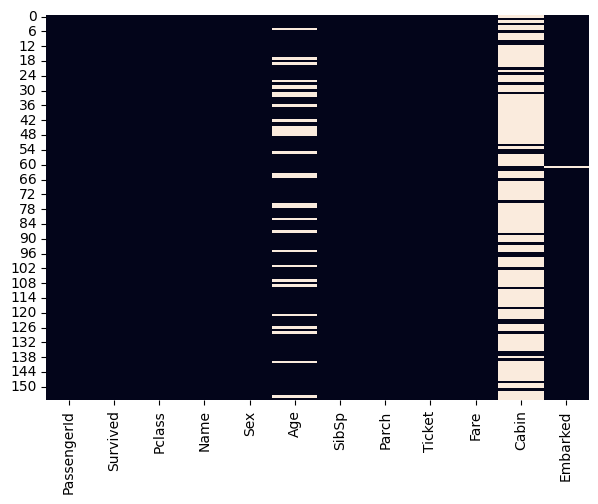

In [8]:
plt.figure(figsize=(7,5))
sns.heatmap(df.isnull(),cbar=False);

- ***Balancing*** della classe

In [10]:
# Non molto bilanciata
df['Survived'].value_counts()

,count
Survived,
0,102
1,54


- Controlo se ci sono valori che si ripetono sempre diversi e se ci sono valori che invece non cambiano mai, in quel caso li vado ad escludere

In [11]:
df['Ticket'].value_counts()

,count
Ticket,
113803,2
347082,2
349909,2
237736,2
S.O.C. 14879,2
...,...
113776,1
A.5. 11206,1
A/5. 851,1


In [12]:
# Droppo infatti quelle colonne che non sono rilevanti né per l'analisi in sé né per il modello
df = df.drop(['Name', 'Ticket', 'Cabin','PassengerId'], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
151,1,1,female,22.0,1,0,66.6000,S
152,0,3,male,55.5,0,0,8.0500,S
153,0,3,male,40.5,0,2,14.5000,S
154,0,3,male,NaN,0,0,7.3125,S


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  156 non-null    int64  
 1   Pclass    156 non-null    int64  
 2   Sex       156 non-null    object 
 3   Age       126 non-null    float64
 4   SibSp     156 non-null    int64  
 5   Parch     156 non-null    int64  
 6   Fare      156 non-null    float64
 7   Embarked  155 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 9.9+ KB


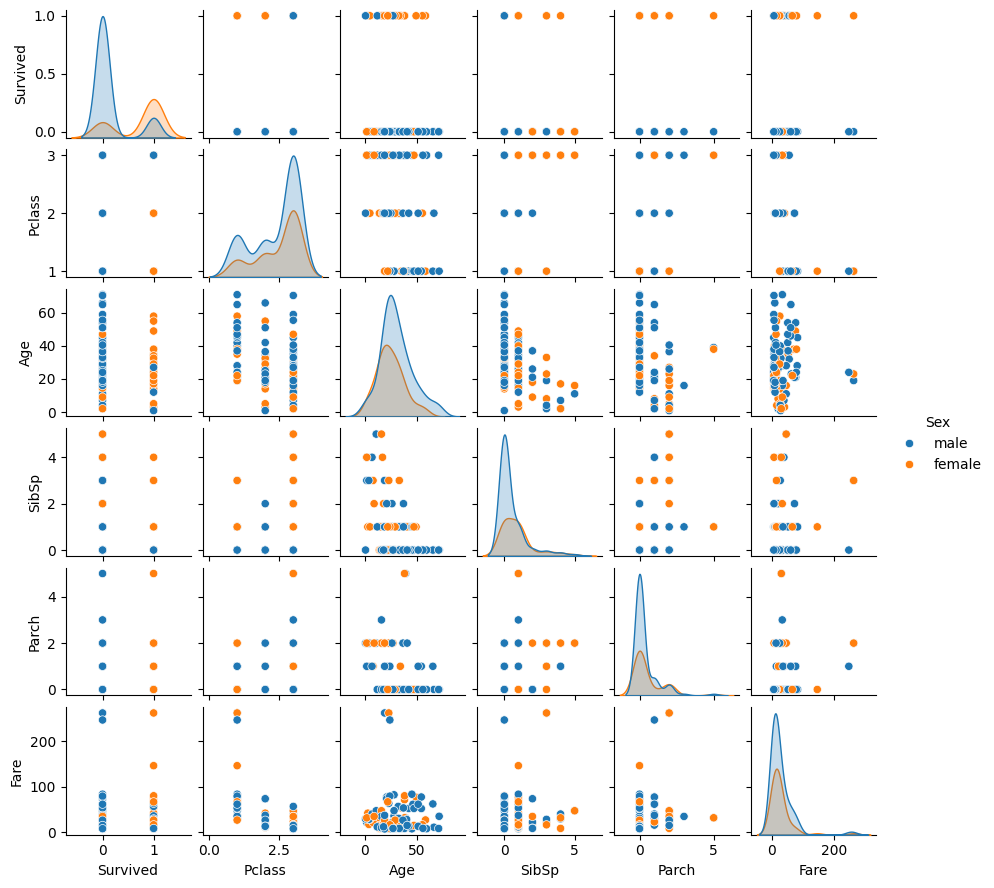

In [14]:
sns.pairplot(df,hue='Sex',height=1.5);

- Vado a vedere di nuovo i valori nulli e in questo caso scelgo di utilizzare l'interpolazione

In [15]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,30
SibSp,0
Parch,0
Fare,0
Embarked,1


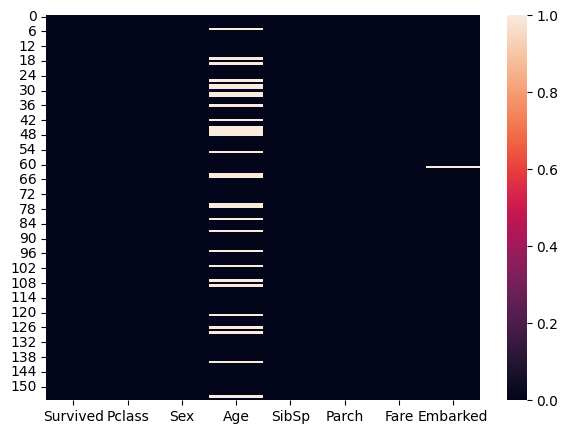

In [16]:
plt.figure(figsize=(7,5))
sns.heatmap(df.isnull());

In [17]:
# Per l'età ho fatto un'interpolazione
df['Age'] = df['Age'].interpolate()

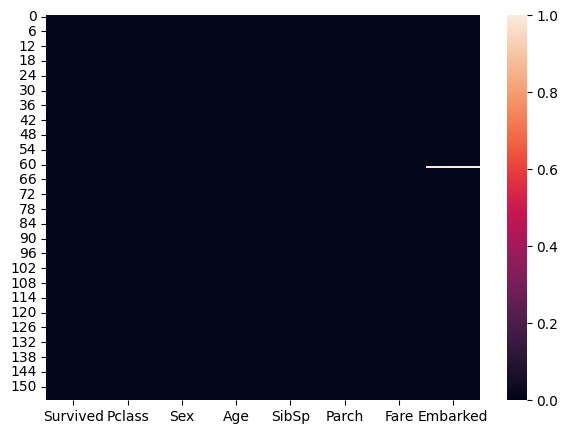

In [18]:
plt.figure(figsize=(7,5))
sns.heatmap(df.isnull());

- vedo com'è composta la colonna Embarked


In [19]:
df['Embarked'].value_counts()

,count
Embarked,
S,110
C,32
Q,13


In [ ]:
#Droppo l'unica riga vuota rimasta
df = df.dropna()

## Analisi Grafica

- Comincio a vedere dove sono le relazioni possibili

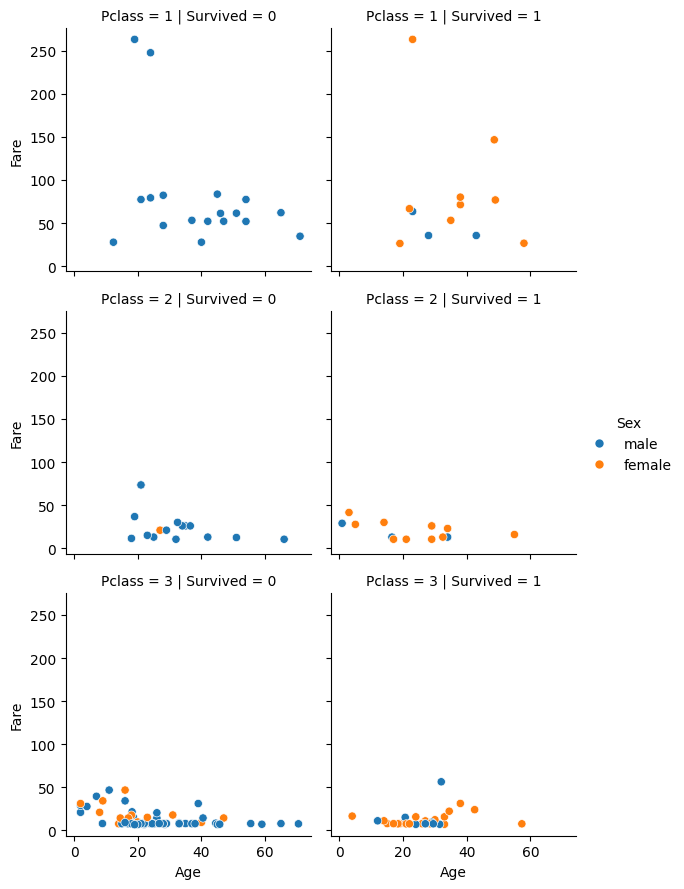

In [20]:
sns.relplot(x="Age", y="Fare", hue="Sex",
                col="Survived", row="Pclass", data=df,height=3)

## Dummizzazione

In [21]:
df =  pd.get_dummies(df, columns=['Embarked','Sex'],dtype=int, drop_first=True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,0,3,22.00,1,0,7.2500,0,1,1
1,1,1,38.00,1,0,71.2833,0,0,0
2,1,3,26.00,0,0,7.9250,0,1,0
3,1,1,35.00,1,0,53.1000,0,1,0
4,0,3,35.00,0,0,8.0500,0,1,1
...,...,...,...,...,...,...,...,...,...
151,1,1,22.00,1,0,66.6000,0,1,0
152,0,3,55.50,0,0,8.0500,0,1,1
153,0,3,40.50,0,2,14.5000,0,1,1
154,0,3,45.75,0,0,7.3125,0,1,1


## Separazione Target e Features


- Vedo come sono poste le colonne e sposto la Target in ultima posizione

In [22]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q',
       'Embarked_S', 'Sex_male'],
      dtype='object')

In [23]:
df = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q',
       'Embarked_S', 'Sex_male','Survived']]

In [24]:
X_ = df.iloc[:,0:-1] #dati non notmalizzati
y = df.iloc[:,-1]

## Standardizzazione

Standardizzo le Features

In [25]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
standardized_data = sc.fit_transform(X_)

X = standardized_data

In [26]:
X

array([[ 0.72760688, -0.43821065,  0.36531077, ..., -0.30151134,
         0.64666979,  0.74833148],
       [-1.79476363,  0.67656551,  0.36531077, ..., -0.30151134,
        -1.54638428, -1.33630621],
       [ 0.72760688, -0.15951661, -0.58449723, ..., -0.30151134,
         0.64666979, -1.33630621],
       ...,
       [ 0.72760688,  0.85074928, -0.58449723, ..., -0.30151134,
         0.64666979,  0.74833148],
       [ 0.72760688,  1.21653521, -0.58449723, ..., -0.30151134,
         0.64666979,  0.74833148],
       [-1.79476363,  1.58232114, -0.58449723, ..., -0.30151134,
        -1.54638428,  0.74833148]])

In [28]:
print(y.shape)
print(X.shape)

(156,)
(156, 8)


## Train test Split

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=667,
                                                    stratify=y # cosi sono sicuro di avere entrambe le categorie
                                                    )

## Scelta Classificatori

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier



classifiers = [DecisionTreeClassifier(max_depth=4),
               RandomForestClassifier(n_estimators=200,random_state=667),
               GradientBoostingClassifier(),
               GradientBoostingClassifier(n_estimators=50),
               LogisticRegression(max_iter=1000),
               GaussianNB(),
               KNeighborsClassifier(n_neighbors=2),
               SVC(probability=True,kernel='rbf'),
               XGBClassifier()
               ]

In [32]:
for cls in classifiers:
    cls.fit(X_train, y_train)
    cls.predict(X_test)

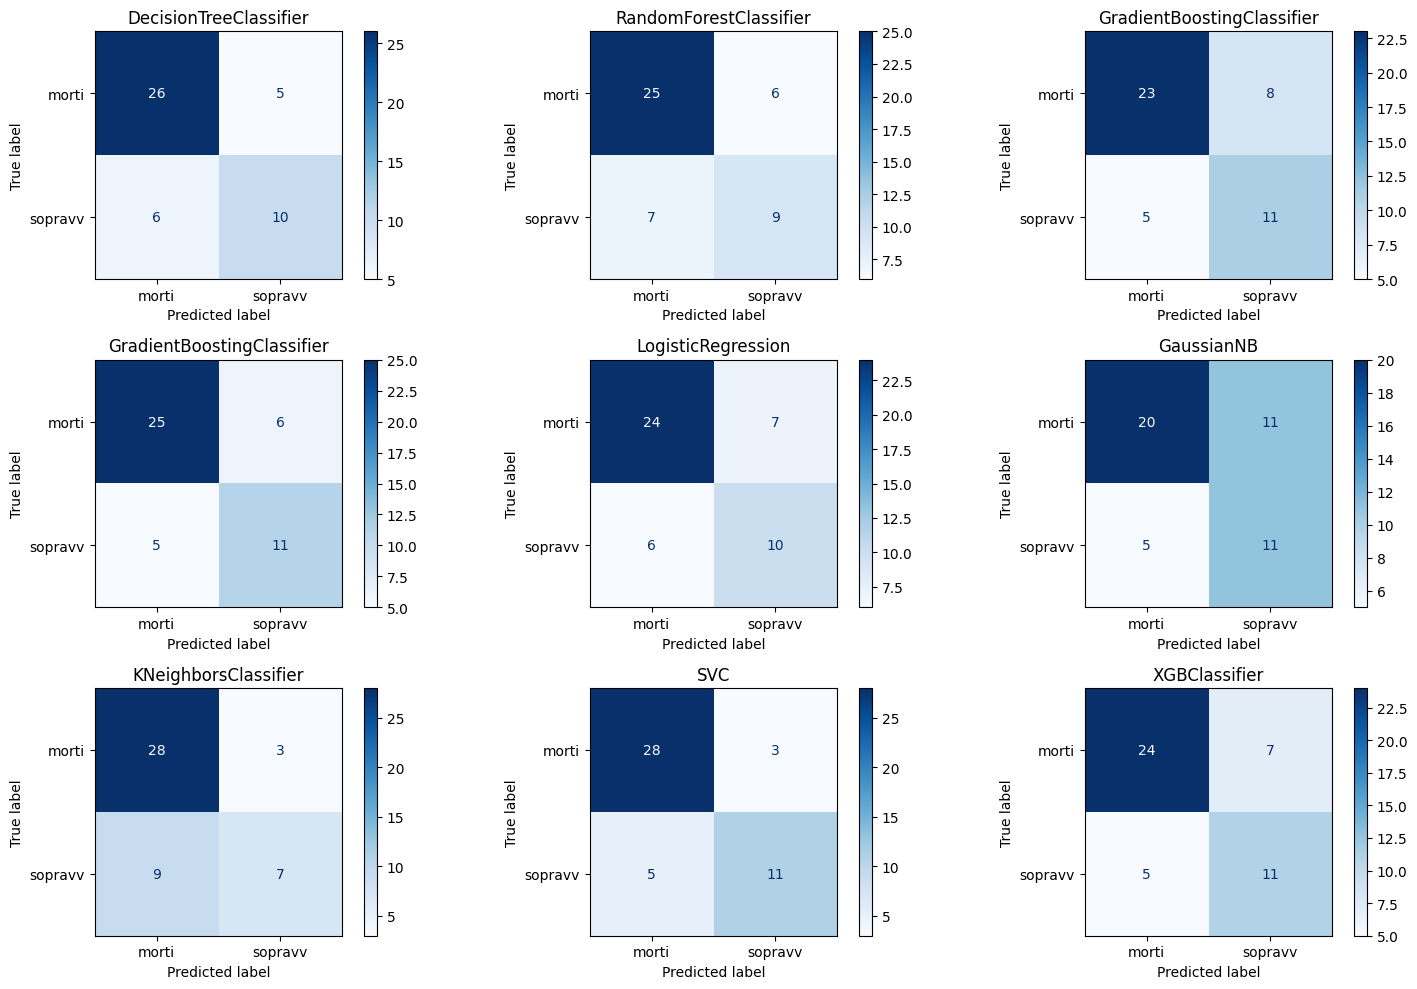

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

labels = ['morti','sopravv']
for cls, ax in zip(classifiers, axes.flatten()):
    ConfusionMatrixDisplay.from_estimator(cls,
                                            X_test,
                                            y_test,
                                            ax=ax,
                                            cmap='Blues',
                                            display_labels=labels,
                                            )
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()
#plt.show()

In [34]:
from sklearn.metrics import classification_report

for cls, ax in zip(classifiers, axes.flatten()):
    print(cls)
    print(classification_report(y_test,cls.predict(X_test),target_names=labels))

DecisionTreeClassifier(max_depth=4)
              precision    recall  f1-score   support

       morti       0.81      0.84      0.83        31
     sopravv       0.67      0.62      0.65        16

    accuracy                           0.77        47
   macro avg       0.74      0.73      0.74        47
weighted avg       0.76      0.77      0.76        47

RandomForestClassifier(n_estimators=200, random_state=667)
              precision    recall  f1-score   support

       morti       0.78      0.81      0.79        31
     sopravv       0.60      0.56      0.58        16

    accuracy                           0.72        47
   macro avg       0.69      0.68      0.69        47
weighted avg       0.72      0.72      0.72        47

GradientBoostingClassifier()
              precision    recall  f1-score   support

       morti       0.82      0.74      0.78        31
     sopravv       0.58      0.69      0.63        16

    accuracy                           0.72        47
   m

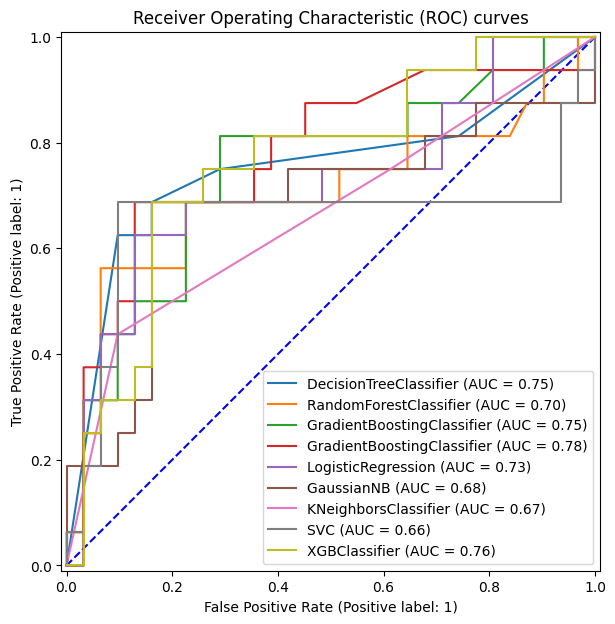

In [35]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

# Train the models and record the results
plt.figure(figsize=(8,7))
ax = plt.gca()
plt.plot([0,1],[0,1],'--b')

for cls in classifiers:
    model = cls.fit(X_train, y_train)
    y_score =model.predict_proba(X_test)[:, 1]
    auc_model = roc_auc_score(y_test,y_score)

    RocCurveDisplay.from_estimator(model, X_test, y_test, label=f'{cls.__class__.__name__} (AUC = {auc_model:.2f})', ax=ax)
    plt.title("Receiver Operating Characteristic (ROC) curves")
    plt.legend(loc=4)

## Best FIT

- scelto un modello, mi dedico alla scelta del best fit

In [37]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search
param_grid = {
                'bootstrap': [True],
                'max_depth': [80, 90, 100, 110],
                'max_features': [2, 3],
                'min_samples_leaf': [3, 4, 5],
                'min_samples_split': [8, 10, 12],
                'n_estimators': [100, 200, 300, 1000]
            }

rf = RandomForestClassifier(random_state=667)
grid_search_rf = GridSearchCV(estimator = rf,
                            param_grid = param_grid,
                            cv = 5,
                            n_jobs = -1,
                            verbose = 2
                            )

In [38]:
%%time
grid_search_rf.fit(X_train, y_train)
grid_search_rf.best_params_

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
CPU times: user 7 s, sys: 1.03 s, total: 8.03 s
Wall time: 13min 16s


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

- Con questi parametri vedo di quanto migliora l'accuracy

In [39]:
from sklearn.metrics import accuracy_score

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    print('Model Performance')
    print(f'Accuracy score: {acc:0.2f} %')
    return  round(acc,2)

best_grid = grid_search_rf.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)
grid_accuracy

Model Performance
Accuracy score: 0.83 %


0.83

Da 0.70 con il best fit aumenta a 0.83. Un buon risultato

- Qui plotto le Features più importanti

Text(0.5, 1.0, 'Visualizing Important Features')

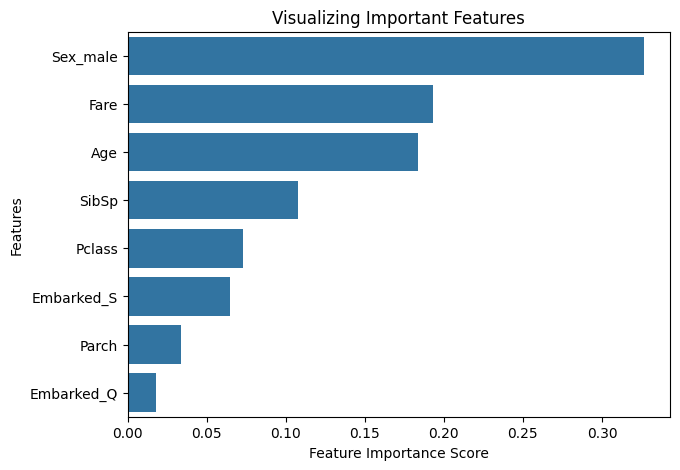

In [40]:
X = df.iloc[:,:-1]
feature_imp = pd.Series(best_grid.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(7,5))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

## Fine dell'EDA

Fatto ciò, ho finito la parte dell'***EDA*** ed inizio la ***PIPE***